In [46]:
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx
import importlib

import dgsp
import bimod_plots as plots

(<Figure size 1500x500 with 6 Axes>, <Axes: >)

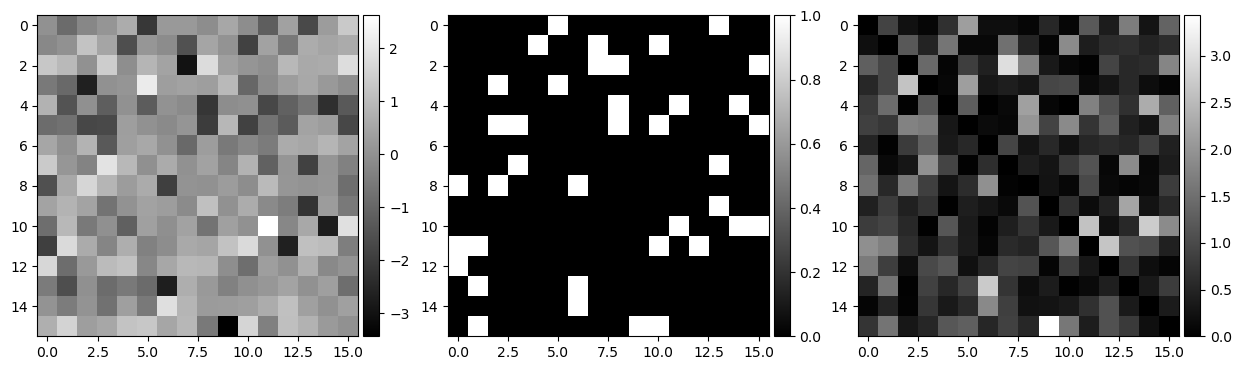

In [99]:
importlib.reload(plots)
importlib.reload(dgsp)

spine_data = np.load("./data/IlaSpineDCM/BigAz.npy")
labels = ['C5_G_D_L', 'C5_G_D_R', 'C5_G_V_L', 'C5_G_V_R',
          'C6_G_D_L', 'C6_G_D_R', 'C6_G_V_L', 'C6_G_V_R',
          'C7_G_D_L', 'C7_G_D_R', 'C7_G_V_L', 'C7_G_V_R',
          'C8_G_D_L', 'C8_G_D_R', 'C8_G_V_R', 'C8_G_V_R',]

spine_data -= np.diag(np.diag(spine_data))
spine_abs = np.abs(spine_data)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].imshow(spine_data, cmap='gray')
plots.add_cbar(fig, ax=axes[0])

z_thresh = 1.5
spine_binary = (np.abs(spine_data) > z_thresh).astype(int)

axes[1].imshow(spine_binary, cmap='gray')
plots.add_cbar(fig, ax=axes[1])

axes[2].imshow(spine_abs, cmap='gray')
plots.add_cbar(fig, ax=axes[2])

#axes[2].imshow(dgsp.modularity_matrix(spine_binary), cmap='gray')

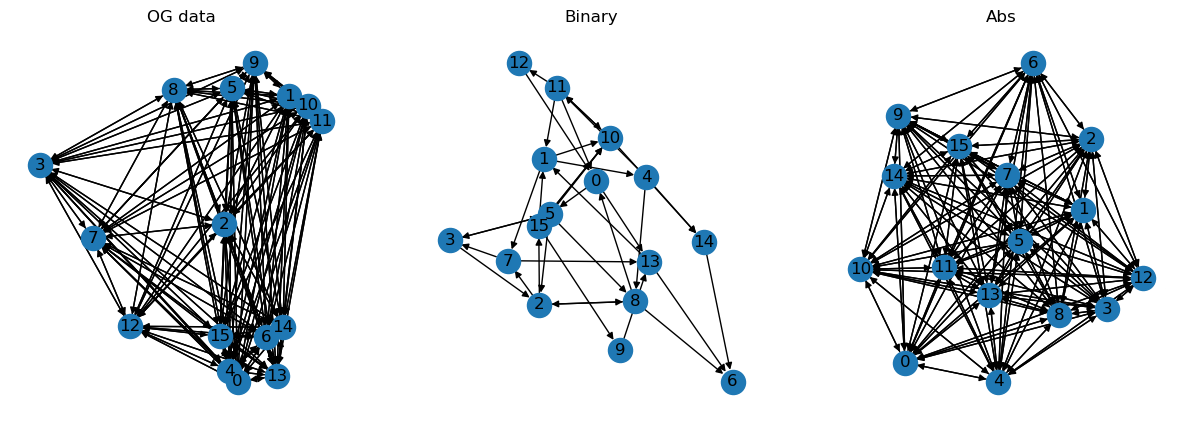

In [129]:
all_graphs = [spine_data, spine_binary, spine_abs]
titles = ["OG data", "Binary", "Abs"]

fig, axes = plt.subplots(ncols=len(all_graphs), figsize=(5*len(all_graphs), 5))

for i, (mx, ax) in enumerate(zip(all_graphs, axes)):
    graph = nx.DiGraph(mx)

    nx.draw(graph, ax=ax, with_labels=True)
    ax.set_title(titles[i])

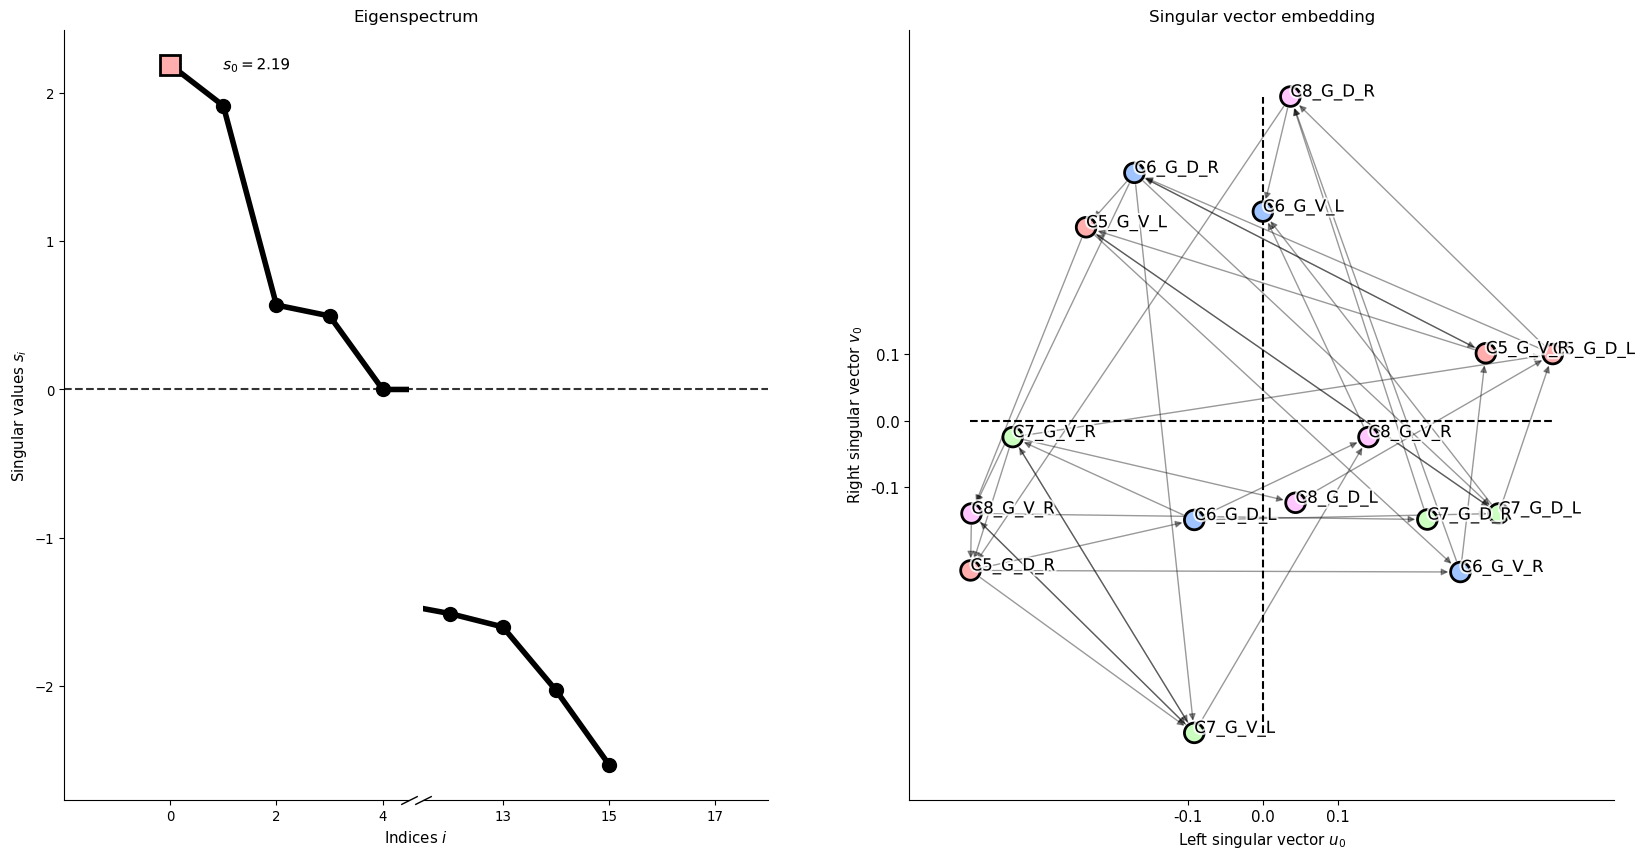

In [132]:
from matplotlib.patheffects import withStroke


importlib.reload(plots)

#modmat = dgsp.modularity_matrix(spine_data, null_model="outin")
#U, S, Vh = dgsp.sorted_SVD(modmat, fix_negative=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

data_graph = spine_binary
vect_id = 0

plots.plot_spectrum(data_graph, vector_id=vect_id, write_s=True, show_n_eig=5, fig=fig, ax=axes[0], fontscale=0.6)

plots.plot_graph_embedding(data_graph, vector_id=vect_id, ax=axes[1], edge_alpha=.4, fontscale=0.6)


U, _, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(data_graph), fix_negative=True)
V = Vh.T

axes[1].plot([0]*2, [V[:, vect_id].min(), V[:, vect_id].max()], color="k", ls="--", zorder=0)
axes[1].plot([U[:, vect_id].min(), U[:, vect_id].max()], [0]*2, color="k", ls="--", zorder=0)

for i, lab in enumerate(labels):
    axes[1].text(U[i, vect_id], V[i, vect_id], lab, fontsize=12,
                 path_effects=[
                     withStroke(
                         linewidth=3,
                         foreground="w",
                         alpha=0.8,
                         )
                         ])